In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import random
import pickle

In [30]:
# error sol on 'https://forums.fast.ai/t/oserror-image-file-is-truncated-38-bytes-not-processed/30806'
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [31]:
DIRECTORY = r"F:\IMP DOCUMENT\College material\SEM#5\New folder\Facial-Emotion-Detection\NewImages"
CATEGORIES = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]

In [38]:
IMG_SIZE = 100 
# take only 1500 images from each category 

data = []
for category in CATEGORIES:
    folder = os.path.join(DIRECTORY,category)
    label = CATEGORIES.index(category)
    # take only 1500 images from each category
    for img in os.listdir(folder)[:3000]:
        img_path = os.path.join(folder,img)
        img_array = cv2.imread(img_path)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE,3))
        data.append([new_array, label])
    # for img in os.listdir(folder):
    #     img_path = os.path.join(folder,img)
    #     img_arr = plt.imread(img_path)
    #     img_arr = cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
    #     data.append([img_arr,label])
random.shuffle(data)

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - Can't parse 'dsize'. Expected sequence length 2, got 3
>  - Can't parse 'dsize'. Expected sequence length 2, got 3


In [33]:
# X=[]
# Y=[]
# for features,label in data:
#     X.append(features)
#     Y.append(label)
# len(X),len(Y)
        # reshape the image (100,100) to (100,100,3

X=[]
Y=[]
for features ,label in data:
    X.append(features)
    Y.append(label)
li = []
len(X),len(Y)


(21000, 21000)

In [ ]:
for i in range(len(X)):
    if X[i].shape == (IMG_SIZE,IMG_SIZE,3) :
        li.append(X[i])
    else:
        #  remove elements from the list
        print(i)
        del Y[i]
len(Y),len(li)

In [36]:
# reshape the image (100,100) to (100,100,3)
X1 = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y1 = np.array(Y).reshape(-1,1,1)

X1.shape,Y1.shape

((21000, 100, 100, 1), (21000, 1, 1))

In [37]:
pickle.dump(X1,open('features100-X2.pkl','wb'))
pickle.dump(Y1,open('labels100-Y2.pkl','wb'))
# choose first 15000 readings from X
X1 = X1[:15000]

In [22]:
# reshape (100,100) to (100,100,3)
X1 = X1.reshape(-1,100,100,3)
Y1 = Y1.reshape(-1,1,1)

X1.shape,Y1.shape


AttributeError: 'list' object has no attribute 'reshape'

In [39]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)

X1 = model.predict(X1)


ValueError: in user code:

    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 248, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "vgg16" (type Functional).
    
    Input 0 of layer "block1_conv1" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (None, 100, 100, 1)
    
    Call arguments received by layer "vgg16" (type Functional):
      • inputs=tf.Tensor(shape=(None, 100, 100, 1), dtype=uint8)
      • training=False
      • mask=None


Happy
F:\IMP DOCUMENT\College material\SEM#5\New folder\Facial-Emotion-Detection\NewImages\Happy


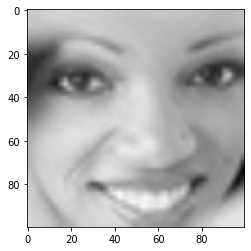

In [44]:
# take random image from Directory
DIRECTORY = r"F:\IMP DOCUMENT\College material\SEM#5\New folder\Facial-Emotion-Detection\NewImages"
CATEGORIES = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]
IMG_SIZE = 100
# print random index from CATEGORIES
RandomC =random.choice(CATEGORIES)
print(RandomC)
# print random image from CATEGORIES
folder = os.path.join(DIRECTORY,RandomC)
print(folder)
img = random.choice(os.listdir(folder))
img_path = os.path.join(folder,img)
img_arr = plt.imread(img_path) 
img_arr = cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
plt.imshow(img_arr)
plt.show()  

#  test image on the save model
img_arr = img_arr.reshape(-1,100,100,3)
img_arr.shape
img_arr = model.predict(img_arr)
